# One-class Support Vector Machine: OC-SVM

In this notebook we explore the using of OC-SVM for anomaly detection. For this purpose, we will use the following procedure:

1. We use the public test set for the training process. We randomly select 80% of the non-contaminated data for training, and the remaining 20% + contaminated data is used for validation.
2. The performance of the model was measured over the private test set.

We perform cross-validation to select the hyperparameter $\nu$, which intuitively means the amount of contaminated data in the dataset.


In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import OneClassSVM

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from torchvision import datasets

def get_mnist(anormal_class, data_dir='./data/mnist/'):
    
    train = datasets.MNIST(root=data_dir, train=True, download=True)
    test = datasets.MNIST(root=data_dir, train=False, download=True)

    x_train = (train.data).float()/255.
    y_train = train.targets

    x_train = x_train[np.where(y_train!=anormal_class)]
    y_train = y_train[np.where(y_train!=anormal_class)]
    y2_train = np.where(y_train==anormal_class, 1, 0)
    data_train = x_train.view(x_train.size(0), -1), y_train, y2_train
    
    x_test = (test.data).float()/255.
    y_test = test.targets
    y2_test = np.where(y_test==anormal_class, 1, 0)
    data_test = x_test.view(x_test.size(0), -1), y_test, y2_test
    return data_train, data_test

In [3]:
anormal_class = 5
data_train, data_test = get_mnist(anormal_class)
x_train, _, y_train = data_train
x_test, _, y_test = data_test

N_val = int(x_test.size(0)*0.9)

In [4]:
x_val = x_test[N_val:]
y_val = y_test[N_val:]
x_test = x_test[:N_val]
y_test = y_test[:N_val]

In [5]:
gammas = [2**-(10), 2**-(9), 2**-(8), 2**-(7), 2**-(6), 2**-(5), 2**-(4), 2**-(3), 2**-(2), 2**-(1)]
nu = 0.1

mean_roc = []
std_roc = []
for gamma in gammas:
    rocs = []
    for rep in range(5):
        clf = OneClassSVM(kernel='rbf', nu=nu, gamma=gamma).fit(x_train)
        y_pred =  clf.score_samples(x_val)
        roc = roc_auc_score(y_val, y_pred)
        rocs.append(roc)
        print('The ROC-AUC for OC-SVM using gamma={} is {}'.format(gamma, roc))
    mean_roc.append(np.mean(rocs))
    std_roc.append(np.std(rocs))

The ROC-AUC for OC-SVM using gamma=0.0009765625 is 0.4257794921247188
The ROC-AUC for OC-SVM using gamma=0.0009765625 is 0.4257794921247188
The ROC-AUC for OC-SVM using gamma=0.0009765625 is 0.4257794921247188
The ROC-AUC for OC-SVM using gamma=0.0009765625 is 0.4257794921247188
The ROC-AUC for OC-SVM using gamma=0.0009765625 is 0.4257794921247188
The ROC-AUC for OC-SVM using gamma=0.001953125 is 0.42072645451623275
The ROC-AUC for OC-SVM using gamma=0.001953125 is 0.42072645451623275
The ROC-AUC for OC-SVM using gamma=0.001953125 is 0.42072645451623275
The ROC-AUC for OC-SVM using gamma=0.001953125 is 0.42072645451623275
The ROC-AUC for OC-SVM using gamma=0.001953125 is 0.42072645451623275
The ROC-AUC for OC-SVM using gamma=0.00390625 is 0.41094181935069113
The ROC-AUC for OC-SVM using gamma=0.00390625 is 0.41094181935069113
The ROC-AUC for OC-SVM using gamma=0.00390625 is 0.41094181935069113
The ROC-AUC for OC-SVM using gamma=0.00390625 is 0.41094181935069113
The ROC-AUC for OC-SVM u

KeyboardInterrupt: 

In [ ]:
plt.errorbar(gammas, mean_roc, yerr=std_roc, color='k', ecolor='r')
plt.grid()
plt.show()

## Using gamma=2**-(10):

In [6]:
clf = OneClassSVM(kernel='rbf', nu=nu, gamma=2**-(10)).fit(x_train)

In [7]:
x_in = x_test[y_test==1]
x_out = x_test[y_test==0]

In [8]:
scores_in =  clf.score_samples(x_in)
scores_out =  clf.score_samples(x_out)
scores = clf.score_samples(x_test)

In [9]:
roc_auc_score(y_test, scores)

0.46107785970766296

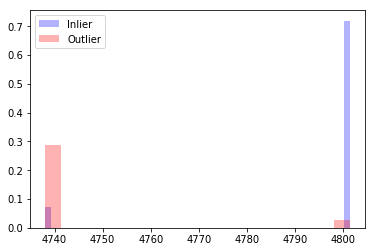

In [10]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()